In [5]:
library(brms)
library(readxl)
library(effects)
library(sjPlot)

Loading required package: carData

lattice theme set by effectsTheme()
See ?effectsTheme for details.

#refugeeswelcome



In [2]:
df <- read_excel("../figures/statistics.xlsx")
df

t1,t2,l1,l2,hits,genre1,genre2,subgenre1,subgenre2,author1,author2,hit_ratio
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
Alexanders geesten,Alexiuslegende,14217,53,1,Epiek,Epiek,Ridder,Heiligenleven,Jacob van Maerlant,NA,1.327138e-06
Alexanders geesten,Anatomie van de mens,14217,180,13,Epiek,Epiek,Ridder,Didactiek,Jacob van Maerlant,NA,5.079990e-06
Alexanders geesten,Arturs doet,14217,12282,1024,Epiek,Epiek,Ridder,Arthur,Jacob van Maerlant,NA,5.864391e-06
Alexanders geesten,Aubri de Borgengoen,14217,345,100,Epiek,Epiek,Ridder,Karel,Jacob van Maerlant,NA,2.038792e-05
Alexanders geesten,Barlaam en Josaphat,14217,177,28,Epiek,Epiek,Ridder,Ridder,Jacob van Maerlant,NA,1.112697e-05
Alexanders geesten,Beatrijs,14217,1038,61,Epiek,Epiek,Ridder,Didactiek,Jacob van Maerlant,NA,4.133563e-06
Alexanders geesten,Bediedenisse van der missen,14217,1283,58,Epiek,Epiek,Ridder,Religie,Jacob van Maerlant,NA,3.179753e-06
Alexanders geesten,Beerte metten breden voeten,14217,173,18,Epiek,Epiek,Ridder,Karel,Jacob van Maerlant,NA,7.318439e-06
Alexanders geesten,Beginsel der oorlogen van Luyck,14217,533,117,Epiek,Epiek,Ridder,Historiografie,Jacob van Maerlant,NA,1.544012e-05


In [3]:
df <- df[!is.na(df['author1']), ]
df <- df[!is.na(df['author2']), ]
df

t1,t2,l1,l2,hits,genre1,genre2,subgenre1,subgenre2,author1,author2,hit_ratio
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
Alexanders geesten,Boec vander wraken,14217,5651,680,Epiek,Epiek,Ridder,Didactiek,Jacob van Maerlant,Jan van Boendale,8.464000e-06
Alexanders geesten,Brabantsche yeesten (B1-5),14217,6584,886,Epiek,Epiek,Ridder,Historiografie,Jacob van Maerlant,Jan van Boendale,9.465334e-06
Alexanders geesten,Der leken spieghel,14217,22005,1489,Epiek,Epiek,Ridder,Didactiek,Jacob van Maerlant,Jan van Boendale,4.759544e-06
Alexanders geesten,Der minnen loep,14217,11139,624,Epiek,Epiek,Ridder,Didactiek,Jacob van Maerlant,Dirc Potter,3.940310e-06
Alexanders geesten,Esopet,14217,1562,84,Epiek,Epiek,Ridder,Dier,Jacob van Maerlant,Calfstaf en Noydekin,3.782599e-06
Alexanders geesten,Floris ende Blancefloer,14217,4006,404,Epiek,Epiek,Ridder,Ridder,Jacob van Maerlant,Diederic van Assenede,7.093531e-06
Alexanders geesten,Heymelijchede der heymelijcheit,14217,2155,135,Epiek,Epiek,Ridder,Didactiek,Jacob van Maerlant,Jacob van Maerlant,4.406345e-06
Alexanders geesten,Merlijn,14217,9113,1019,Epiek,Epiek,Ridder,Arthur,Jacob van Maerlant,Jacob van Maerlant,7.865111e-06
Alexanders geesten,Historie van Troyen,14217,37582,3067,Epiek,Epiek,Ridder,Ridder,Jacob van Maerlant,Jacob van Maerlant,5.740185e-06


In [4]:
compareNA <- function(v1,v2) {
    same <- (v1 == v2) | (is.na(v1) & is.na(v2))
    same[is.na(same)] <- FALSE
    return(same)
}

In [5]:
df['author'] <- compareNA(df['author1'], df['author2'])
df['genre'] <- compareNA(df['subgenre1'], df['subgenre2'])
df

t1,t2,l1,l2,hits,genre1,genre2,subgenre1,subgenre2,author1,author2,hit_ratio,author,genre
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<lgl>,<lgl>
Alexanders geesten,Boec vander wraken,14217,5651,680,Epiek,Epiek,Ridder,Didactiek,Jacob van Maerlant,Jan van Boendale,8.464000e-06,FALSE,FALSE
Alexanders geesten,Brabantsche yeesten (B1-5),14217,6584,886,Epiek,Epiek,Ridder,Historiografie,Jacob van Maerlant,Jan van Boendale,9.465334e-06,FALSE,FALSE
Alexanders geesten,Der leken spieghel,14217,22005,1489,Epiek,Epiek,Ridder,Didactiek,Jacob van Maerlant,Jan van Boendale,4.759544e-06,FALSE,FALSE
Alexanders geesten,Der minnen loep,14217,11139,624,Epiek,Epiek,Ridder,Didactiek,Jacob van Maerlant,Dirc Potter,3.940310e-06,FALSE,FALSE
Alexanders geesten,Esopet,14217,1562,84,Epiek,Epiek,Ridder,Dier,Jacob van Maerlant,Calfstaf en Noydekin,3.782599e-06,FALSE,FALSE
Alexanders geesten,Floris ende Blancefloer,14217,4006,404,Epiek,Epiek,Ridder,Ridder,Jacob van Maerlant,Diederic van Assenede,7.093531e-06,FALSE,TRUE
Alexanders geesten,Heymelijchede der heymelijcheit,14217,2155,135,Epiek,Epiek,Ridder,Didactiek,Jacob van Maerlant,Jacob van Maerlant,4.406345e-06,TRUE,FALSE
Alexanders geesten,Merlijn,14217,9113,1019,Epiek,Epiek,Ridder,Arthur,Jacob van Maerlant,Jacob van Maerlant,7.865111e-06,TRUE,FALSE
Alexanders geesten,Historie van Troyen,14217,37582,3067,Epiek,Epiek,Ridder,Ridder,Jacob van Maerlant,Jacob van Maerlant,5.740185e-06,TRUE,TRUE


In [6]:
# https://www.andrewheiss.com/blog/2021/11/08/beta-regression-guide/

In [7]:
intercept_only <- brm(
  bf(hit_ratio ~ 1,
     phi ~ 1),
  data = df,
  family =  zero_inflated_beta(),
  chains = 4, iter = 2000, warmup = 1000,
  cores = 4, seed = 1234, 
)

Compiling Stan program...

Start sampling



In [8]:
genre_only <- brm(
  bf(hit_ratio ~ genre,
     phi ~ genre),
  data = df,
  family =  zero_inflated_beta(),
  chains = 4, iter = 2000, warmup = 1000,
  cores = 4, seed = 1234, 
)

Compiling Stan program...

Start sampling



In [9]:
author_only <- brm(
  bf(hit_ratio ~ author,
     phi ~ author),
  data = df,
  family =  zero_inflated_beta(),
  chains = 4, iter = 2000, warmup = 1000,
  cores = 4, seed = 1234, 
)

Compiling Stan program...

recompiling to avoid crashing R session

Start sampling



In [10]:
covariate <- brm(
  bf(hit_ratio ~ genre + author,
     phi ~ genre + author),
  data = df,
  family =  zero_inflated_beta(),
  chains = 4, iter = 2000, warmup = 1000,
  cores = 4, seed = 1234, 
)

Compiling Stan program...

recompiling to avoid crashing R session

Start sampling



In [11]:
covariate

 Family: zero_inflated_beta 
  Links: mu = logit; phi = log; zi = identity 
Formula: hit_ratio ~ genre + author 
         phi ~ genre + author
   Data: df (Number of observations: 1122) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Population-Level Effects: 
               Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept        -12.30      0.03   -12.35   -12.25 1.00     4365     3412
phi_Intercept     12.90      0.05    12.79    13.00 1.00     4034     2984
genreTRUE          0.95      0.08     0.80     1.11 1.00     2816     2889
authorTRUE         0.47      0.09     0.30     0.65 1.00     3904     2494
phi_genreTRUE     -1.73      0.12    -1.97    -1.49 1.00     3148     2579
phi_authorTRUE    -0.39      0.18    -0.75    -0.06 1.00     4067     2860

Family Specific Parameters: 
   Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
zi     0.05      0.01     0.04     0.07 1.00     5187     28

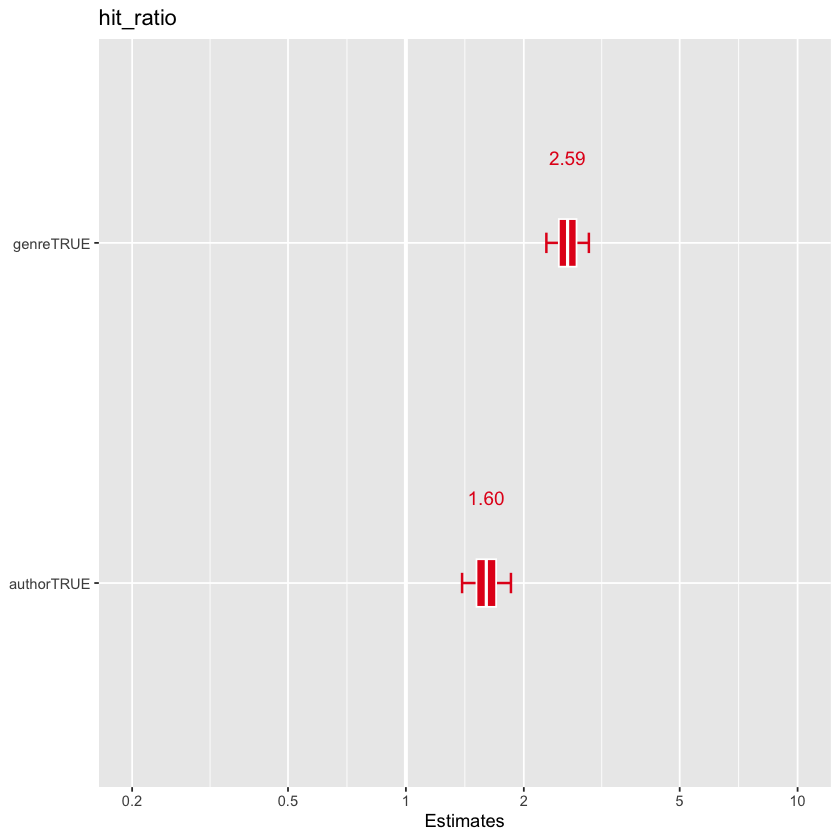

In [12]:
plot_model(covariate, type="est", show.values=T, sort.est=TRUE, terms=c("genreTRUE", "authorTRUE"))

In [13]:
intercept_only <- add_criterion(intercept_only, 'loo')
author_only <- add_criterion(author_only, 'loo')
genre_only <- add_criterion(genre_only, 'loo')
covariate <- add_criterion(covariate, 'loo')

Warning message:
“Found 2 observations with a pareto_k > 0.7 in model 'intercept_only'. It is recommended to set 'moment_match = TRUE' in order to perform moment matching for problematic observations. ”
Warning message:
“Found 2 observations with a pareto_k > 0.7 in model 'author_only'. It is recommended to set 'moment_match = TRUE' in order to perform moment matching for problematic observations. ”
Warning message:
“Found 1 observations with a pareto_k > 0.7 in model 'genre_only'. It is recommended to set 'moment_match = TRUE' in order to perform moment matching for problematic observations. ”
Warning message:
“Found 2 observations with a pareto_k > 0.7 in model 'covariate'. It is recommended to set 'moment_match = TRUE' in order to perform moment matching for problematic observations. ”


In [14]:
loo <- loo_compare(intercept_only, author_only, genre_only, covariate, criterion = "loo")
loo

,elpd_diff,se_diff,elpd_loo,se_elpd_loo,p_loo,se_p_loo,looic,se_looic
covariate,0.00000,0.000000,11586.54,120.8109,19.74118,8.772181,-23173.08,241.6218
genre_only,-10.78567,8.414087,11575.76,119.2000,14.73973,6.621479,-23151.51,238.4000
author_only,-158.65013,69.922564,11427.89,153.4879,27.69056,16.106643,-22855.78,306.9759
intercept_only,-180.69594,57.632666,11405.85,144.0236,18.48824,10.922127,-22811.69,288.0472


In [15]:
waic_wts <- model_weights(intercept_only, author_only, genre_only, covariate, weights = "waic")
waic_wts

intercept_only    author_only     genre_only      covariate 
  2.527689e-79   1.531357e-69   2.558403e-05   9.999744e-01